In [1]:
import nltk

def format_sentence(sent):
    return({word: True for word in nltk.word_tokenize(sent)})

In [2]:
{'!': True, 'animals': True, 'are': True, 'the': True, 'ever': True, 'Dogs': True, 'best': True}

{'!': True,
 'Dogs': True,
 'animals': True,
 'are': True,
 'best': True,
 'ever': True,
 'the': True}

In [3]:
pos = []
with open("./pos_tweets.txt") as f:
    for i in f: 
        pos.append([format_sentence(i), 'pos'])

In [5]:
neg = []
with open("./neg_tweets.txt") as f:
    for i in f: 
        neg.append([format_sentence(i.decode('utf-8')), 'neg'])

In [6]:
training = pos[:int((.9)*len(pos))] + neg[:int((.9)*len(neg))]

In [7]:
test = pos[int((.9)*len(pos)):] + neg[int((.9)*len(neg)):]

In [8]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(training)

In [9]:
classifier.show_most_informative_features()

Most Informative Features
                      no = True              neg : pos    =     20.6 : 1.0
                 awesome = True              pos : neg    =     18.7 : 1.0
                headache = True              neg : pos    =     18.0 : 1.0
               beautiful = True              pos : neg    =     14.2 : 1.0
                    love = True              pos : neg    =     14.2 : 1.0
                      Hi = True              pos : neg    =     12.7 : 1.0
                    glad = True              pos : neg    =      9.7 : 1.0
                   Thank = True              pos : neg    =      9.7 : 1.0
                     fan = True              pos : neg    =      9.7 : 1.0
                    lost = True              neg : pos    =      9.3 : 1.0


In [10]:
example1 = "this workshop is awesome."

print classifier.classify(format_sentence(example1))

pos


In [11]:
example2 = "this workshop is awful."

print classifier.classify(format_sentence(example2))

neg


In [12]:
from nltk.classify.util import accuracy
print accuracy(classifier, test)

0.865671641791


In [15]:
import nltk 

text = nltk.word_tokenize("Python is an awesome language!")
nltk.pos_tag(text)

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('awesome', 'JJ'),
 ('language', 'NN'),
 ('!', '.')]

In [16]:
[('Python', 'NNP'), ('is', 'VBZ'), ('an', 'DT'), ('awesome', 'JJ'), ('language', 'NN'), ('!', '.')]

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('awesome', 'JJ'),
 ('language', 'NN'),
 ('!', '.')]

In [17]:
nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [18]:
from nltk.corpus import brown

brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[(u'Various', u'JJ'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'apartments', u'NNS'),
 (u'are', u'BER'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'terrace', u'NN'),
 (u'type', u'NN'),
 (u',', u','),
 (u'being', u'BEG'),
 (u'on', u'IN'),
 (u'the', u'AT'),
 (u'ground', u'NN'),
 (u'floor', u'NN'),
 (u'so', u'QL'),
 (u'that', u'CS'),
 (u'entrance', u'NN'),
 (u'is', u'BEZ'),
 (u'direct', u'JJ'),
 (u'.', u'.')]

In [19]:
[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'QL'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]


[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [20]:
bigram_tagger = nltk.BigramTagger(brown_tagged_sents)
bigram_tagger.tag(brown_sents[2007])

[(u'Various', u'JJ'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'apartments', u'NNS'),
 (u'are', u'BER'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'terrace', u'NN'),
 (u'type', u'NN'),
 (u',', u','),
 (u'being', u'BEG'),
 (u'on', u'IN'),
 (u'the', u'AT'),
 (u'ground', u'NN'),
 (u'floor', u'NN'),
 (u'so', u'CS'),
 (u'that', u'CS'),
 (u'entrance', u'NN'),
 (u'is', u'BEZ'),
 (u'direct', u'JJ'),
 (u'.', u'.')]

In [21]:
[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [22]:
raw = "OMG, Natural Language Processing is SO cool and I'm really enjoying this workshop!"
tokens = nltk.word_tokenize(raw)
tokens = [i.lower() for i in tokens]

In [23]:
['omg', ',', 'natural', 'language', 'processing', 'is', 'so', 'cool', 'and', 'i', "'m", 'really', 'enjoying', 'this', 'workshop', '!']

['omg',
 ',',
 'natural',
 'language',
 'processing',
 'is',
 'so',
 'cool',
 'and',
 'i',
 "'m",
 'really',
 'enjoying',
 'this',
 'workshop',
 '!']

In [24]:
lancaster = nltk.LancasterStemmer()
stems = [lancaster.stem(i) for i in tokens]

In [25]:
['omg', ',', 'nat', 'langu', 'process', 'is', 'so', 'cool', 'and', 'i', "'m", 'real', 'enjoy', 'thi', 'workshop', '!']

['omg',
 ',',
 'nat',
 'langu',
 'process',
 'is',
 'so',
 'cool',
 'and',
 'i',
 "'m",
 'real',
 'enjoy',
 'thi',
 'workshop',
 '!']

In [26]:
porter = nltk.PorterStemmer()
stem = [porter.stem(i) for i in tokens]

In [27]:
['omg', ',', 'natur', 'languag', 'process', 'is', 'so', 'cool', 'and', 'i', "'m", 'realli', 'enjoy', 'thi', 'workshop', '!']

['omg',
 ',',
 'natur',
 'languag',
 'process',
 'is',
 'so',
 'cool',
 'and',
 'i',
 "'m",
 'realli',
 'enjoy',
 'thi',
 'workshop',
 '!']

In [28]:
from nltk import WordNetLemmatizer

lemma = nltk.WordNetLemmatizer()
text = "Women in technology are amazing at coding"
ex = [i.lower() for i in text.split()]

lemmas = [lemma.lemmatize(i) for i in ex]

In [29]:
['woman', 'in', 'technology', 'are', 'amazing', 'at', 'coding']

['woman', 'in', 'technology', 'are', 'amazing', 'at', 'coding']

In [31]:
from nltk.corpus import wordnet as wn

In [32]:
print(wn.synsets('motorcar'))

[Synset('car.n.01')]


In [34]:
print(wn.synset('car.n.01').lemma_names())

[u'car', u'auto', u'automobile', u'machine', u'motorcar']


In [35]:
print(wn.synset('car.n.01').definition())

a motor vehicle with four wheels; usually propelled by an internal combustion engine


In [36]:
'a motor vehicle with four wheels; usually propelled by an internal combustion engine'


'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [40]:
import nltk 
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), ("dog", "NN"), ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]

In [41]:
pattern = "NP: {<DT>?<JJ>*<NN>}" 

In [42]:
NPChunker = nltk.RegexpParser(pattern) 

In [43]:
result = NPChunker.parse(sentence) 
result.draw()

In [44]:
import spacy
import pandas as pd

In [45]:
pd.set_option('display.max_colwidth', -1)

In [46]:
nlp = spacy.load('en')

In [48]:
review = "Columbia University was founded in 1754 as King's College by royal charter of King George II of England. It is the oldest institution of higher learning in the state of New York and the fifth oldest in the United States. Controversy preceded the founding of the College, with various groups competing to determine its location and religious affiliation. Advocates of New York City met with success on the first point, while the Anglicans prevailed on the latter. However, all constituencies agreed to commit themselves to principles of religious liberty in establishing the policies of the College. In July 1754, Samuel Johnson held the first classes in a new schoolhouse adjoining Trinity Church, located on what is now lower Broadway in Manhattan. There were eight students in the class. At King's College, the future leaders of colonial society could receive an education designed to 'enlarge the Mind, improve the Understanding, polish the whole Man, and qualify them to support the brightest Characters in all the elevated stations in life.'' One early manifestation of the institution's lofty goals was the establishment in 1767 of the first American medical school to grant the M.D. degree."

In [2]:
import nltk
import re
content = "Starbucks has not been doing well lately"

In [3]:
tokenized = nltk.word_tokenize(content)
tagged = nltk.pos_tag(tokenized)
print(tagged)

[('Starbucks', 'NNP'), ('has', 'VBZ'), ('not', 'RB'), ('been', 'VBN'), ('doing', 'VBG'), ('well', 'RB'), ('lately', 'RB')]


In [4]:
namedEnt = nltk.ne_chunk(tagged)
namedEnt.draw()

In [5]:
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    for rel in nltk.sem.relextract.extract_rels('ORG', 'LOC', doc,corpus='ieer', pattern = IN):
         print (nltk.sem.relextract.rtuple(rel))

[ORG: u'WHYY'] u'in' [LOC: u'Philadelphia']
[ORG: u'McGlashan &AMP; Sarrail'] u'firm in' [LOC: u'San Mateo']
[ORG: u'Freedom Forum'] u'in' [LOC: u'Arlington']
[ORG: u'Brookings Institution'] u', the research group in' [LOC: u'Washington']
[ORG: u'Idealab'] u', a self-described business incubator based in' [LOC: u'Los Angeles']
[ORG: u'Open Text'] u', based in' [LOC: u'Waterloo']
[ORG: u'WGBH'] u'in' [LOC: u'Boston']
[ORG: u'Bastille Opera'] u'in' [LOC: u'Paris']
[ORG: u'Omnicom'] u'in' [LOC: u'New York']
[ORG: u'DDB Needham'] u'in' [LOC: u'New York']
[ORG: u'Kaplan Thaler Group'] u'in' [LOC: u'New York']
[ORG: u'BBDO South'] u'in' [LOC: u'Atlanta']
[ORG: u'Georgia-Pacific'] u'in' [LOC: u'Atlanta']


In [6]:
import urllib

In [7]:
test_url = "https://dl.dropboxusercontent.com/u/8082731/datasets/UMICH-SI650/testdata.txt"
train_url = "https://dl.dropboxusercontent.com/u/8082731/datasets/UMICH-SI650/training.txt"

test_file = 'test_data.csv'
train_file = 'train_data.csv'

In [14]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer        
from nltk.stem.porter import PorterStemmer

In [15]:
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = [stemmer.stem(item) for item in tokens]
    return(stemmed)

In [16]:
def tokenize(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return(stems)

In [17]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    stop_words = 'english',
    max_features = 85
)

In [22]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

In [30]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [31]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)

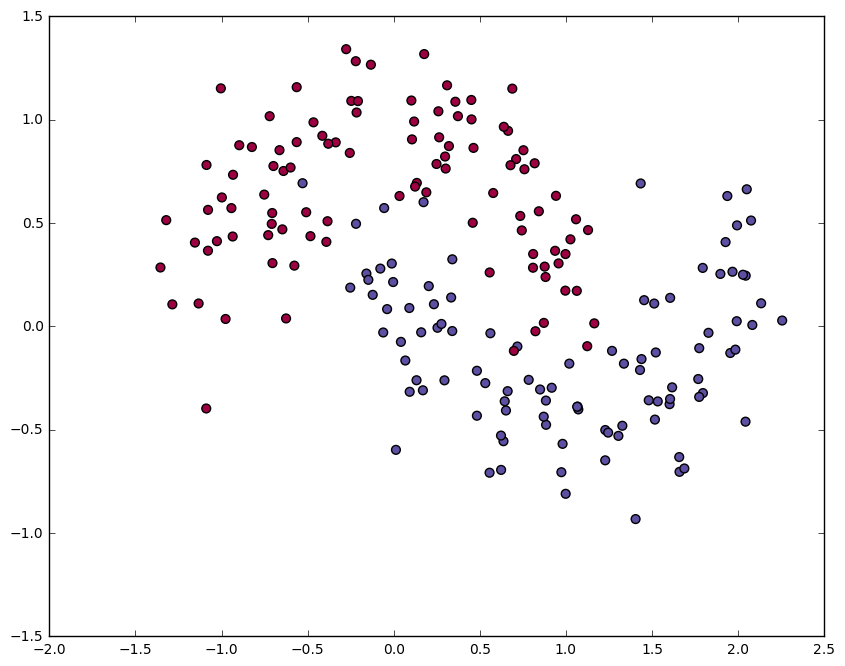

In [32]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [33]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [34]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

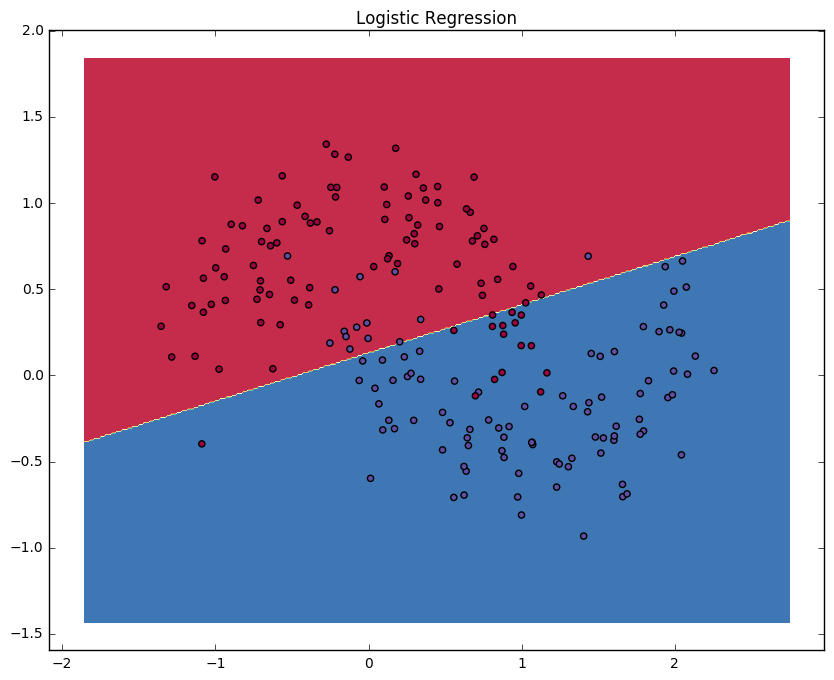

In [35]:
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.show()

In [36]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

In [37]:
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [38]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss 
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return (1./num_examples * data_loss)

In [39]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return (np.argmax(probs, axis=1))

In [40]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):

    # Initialize the parameters to random values
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    # Gradient descent for each batch
    for i in xrange(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms 
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2

        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        if print_loss and i % 1000 == 0:
          print "Loss after iteration %i: %f" %(i, calculate_loss(model))

    return (model)

In [41]:
model = build_model(3, print_loss=True)

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068939
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


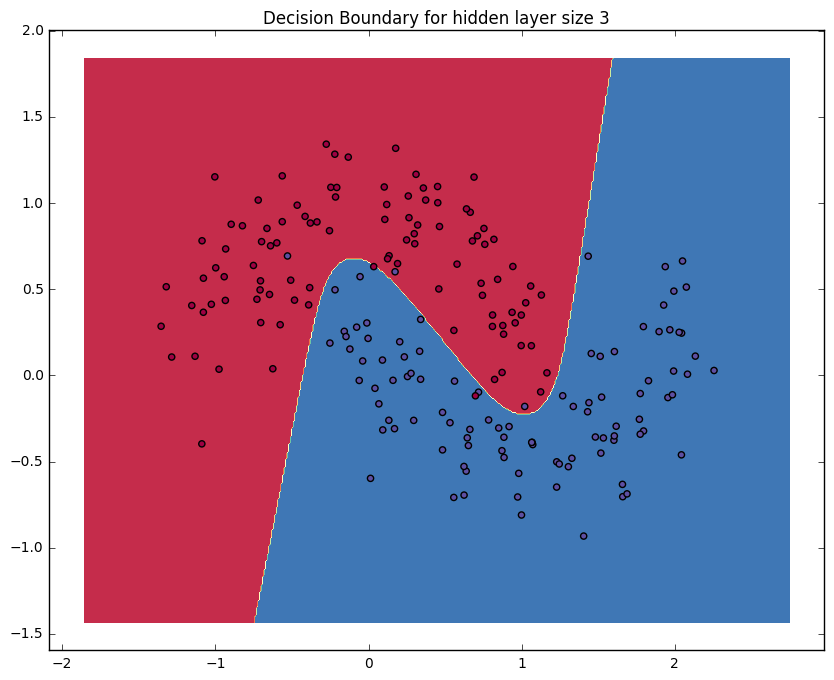

In [42]:
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()

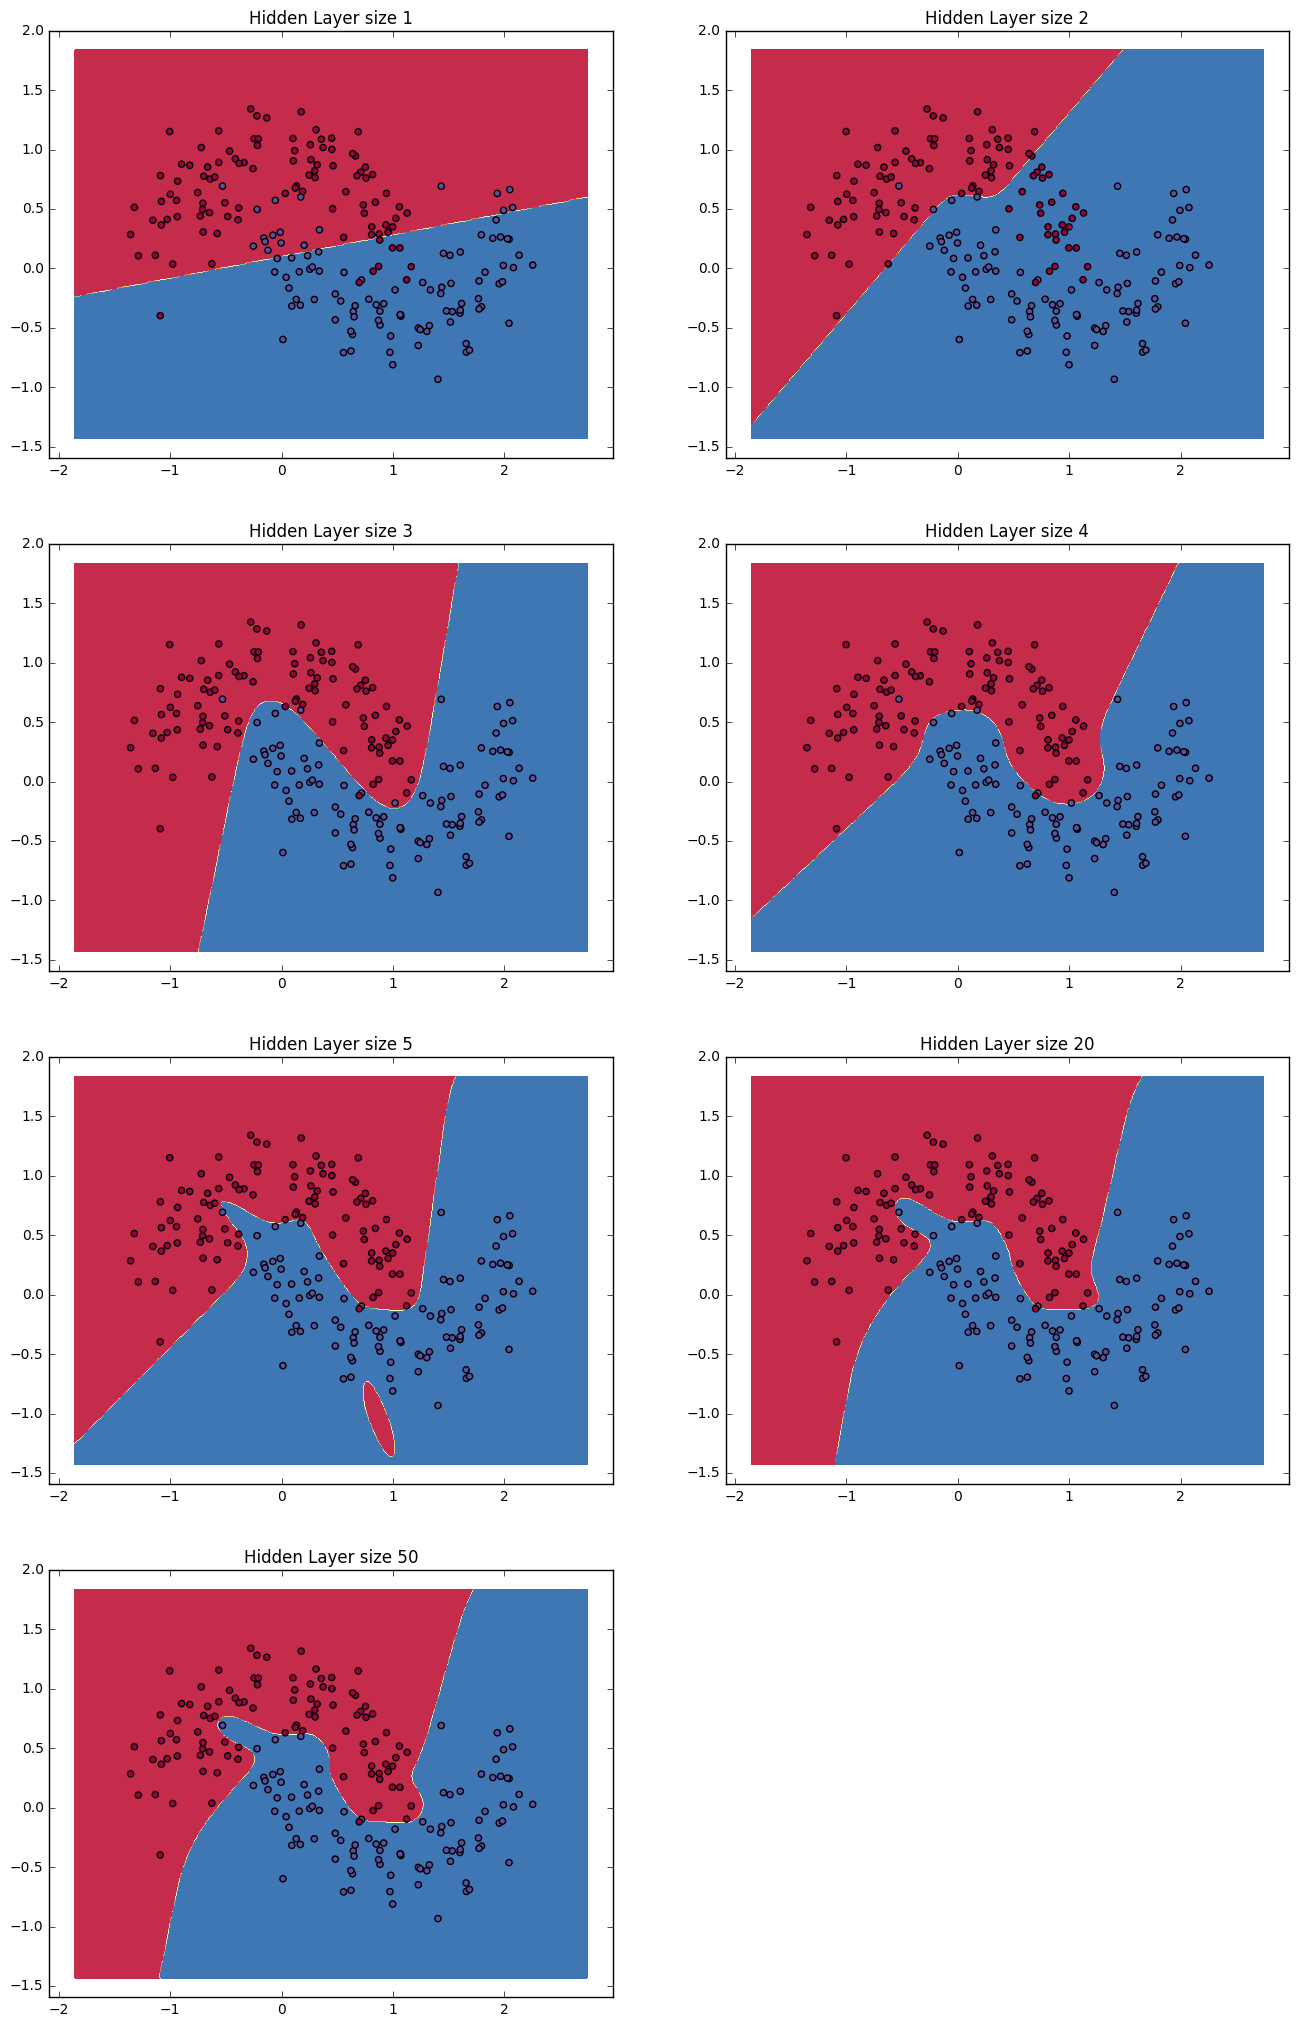

In [43]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

In [44]:
import theano
import numpy

In [45]:
x = theano.tensor.fvector('x')
W = theano.shared(numpy.asarray([0.2, 0.7]), 'W')
y = (x * W).sum()

In [46]:
f = theano.function([x], y)

output = f([1.0, 1.0])

In [49]:
x = tf.placeholder("float", shape=[None, 784])
y_ = tf.placeholder("float", shape=[None, 10])

In [50]:
x_image = tf.reshape(x, [-1,28,28,1])

In [51]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [52]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [53]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [54]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [55]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

In [56]:
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

In [58]:
stemmer = PorterStemmer()

def removeStopWords(stopwords, list):
    return([word for word in list if word not in stopwords])


def tokenise(words, string):
    string = self.clean(string)
    words = string.split(" ")
    return ([self.stemmer.stem(word,0,len(word)-1) for word in words])

In [59]:
def getVectorKeywordIndex(documentList):
        """create the keyword associated to the position of the elements within the document vectors"""

        # Maps documents into a single word string
        vocabularyString = " ".join(documentList)

        vocabularyList = self.parser.tokenise(vocabularyString)

        vocabularyList = self.parser.removeStopWords(vocabularyList)
        uniqueVocabularyList = util.removeDuplicates(vocabularyList)

        vectorIndex={}
        offset=0
        # Associate a position with the keywords which maps to the dimension on the vector used to represent this word
        for word in uniqueVocabularyList:
                vectorIndex[word]=offset
                offset+=1
        return(vectorIndex)  

In [60]:
def makeVector(wordString):

        # Initialise vector with 0's
        vector = [0] * len(self.vectorKeywordIndex)
        wordList = self.parser.tokenise(wordString)
        wordList = self.parser.removeStopWords(wordList)
        for word in wordList:
                vector[self.vectorKeywordIndex[word]] += 1; # Use Simple Term Count Model
        return(vector)

In [61]:
def cosine(vector1, vector2):
        """related documents j and q are in the concept space by comparing the vectors:
                cosine  = ( V1 * V2 ) / ||V1|| x ||V2|| """
        return(float(dot(vector1,vector2) / (norm(vector1) * norm(vector2))))

In [62]:
def search(searchList, documentVectors):
        """ search for documents that match based on a list of terms """
        queryVector = self.buildQueryVector(searchList)

        ratings = [util.cosine(queryVector, documentVector) for documentVector in documentVectors]
        ratings.sort(reverse=True)
        return(ratings)

In [64]:
from gensim.models import Word2Vec
from nltk.corpus import brown, movie_reviews, treebank

In [65]:
b = Word2Vec(brown.sents())
mr = Word2Vec(movie_reviews.sents())
t = Word2Vec(treebank.sents())

In [66]:
print(b.most_similar('money', topn=5))
print(mr.most_similar('money', topn=5))
print(t.most_similar('money', topn=5))

[(u'care', 0.9146088361740112), (u'chance', 0.9036040306091309), (u'job', 0.8981358408927917), (u'trouble', 0.8752985000610352), (u'everything', 0.8739215731620789)]
[(u'him', 0.7642583250999451), (u'home', 0.751272439956665), (u'someone', 0.7491785883903503), (u'sleep', 0.7444579601287842), (u'waiting', 0.7345355749130249)]
[(u'federal', 0.9998856782913208), (u'all', 0.9998772144317627), (u'new', 0.9998764991760254), (u'only', 0.9998746514320374), (u'even', 0.9998691082000732)]


In [67]:
print(b.most_similar('great', topn=5))
print(mr.most_similar('great', topn=5))
print(t.most_similar('great', topn=5))

[(u'common', 0.8809024095535278), (u'experience', 0.8796659111976624), (u'limited', 0.8419110774993896), (u'part', 0.8299457430839539), (u'history', 0.8121081590652466)]
[(u'nice', 0.840477705001831), (u'wonderful', 0.8130226731300354), (u'good', 0.7943077087402344), (u'decent', 0.7798915505409241), (u'fine', 0.7764751315116882)]
[(u'out', 0.9992267489433289), (u'what', 0.9992022514343262), (u'if', 0.9991805553436279), (u'we', 0.9991364479064941), (u'not', 0.9991337656974792)]


In [68]:
print(b.most_similar('company', topn=5))
print(mr.most_similar('company', topn=5))
print(t.most_similar('company', topn=5))

[(u'Giants', 0.9564706087112427), (u'appeal', 0.9483262896537781), (u'secret', 0.9389036893844604), (u'ring', 0.9377460479736328), (u'streak', 0.9369239211082458)]
[(u'church', 0.9086294770240784), (u'dying', 0.8947325944900513), (u'army', 0.8910303115844727), (u'village', 0.8885689973831177), (u'attic', 0.8850772380828857)]
[(u'is', 0.9996036291122437), (u'that', 0.9995973110198975), (u'they', 0.999519944190979), (u'have', 0.9993108510971069), (u'``', 0.9991960525512695)]


In [87]:
import tensorflow as tf
import numpy as np

In [108]:
class TextCNN(object):
    def __init__(self, sequence_length, num_classes, vocab_size, embedding_size, filter_sizes, num_filters):
        self.input_x = tf.placeholder(tf.int32, [None, sequence_length], name="input_x")
        self.input_y = tf.placeholder(tf.float32, [None, num_classes], name="input_y")
        self.dropout_keep_prob = tf.placeholder(tf.float32, name="dropout_keep_prob")
        with tf.device('/cpu:0'), tf.name_scope("embedding"):
            W = tf.Variable(tf.random_uniform([vocab_size, embedding_size], -1.0, 1.0),
        name="W")
            self.embedded_chars = tf.nn.embedding_lookup(W, self.input_x)
            self.embedded_chars_expanded = tf.expand_dims(self.embedded_chars, -1)
            pooled_outputs = []
            for i, filter_size in enumerate(filter_sizes):
                with tf.name_scope("conv-maxpool-%s" % filter_size):
                    filter_shape = [filter_size, embedding_size, 1, num_filters]
                    W = tf.Variable(tf.truncated_normal(filter_shape, stddev=0.1), name="W")
                    b = tf.Variable(tf.constant(0.1, shape=[num_filters]), name="b")
                    conv = tf.nn.conv2d(
                        self.embedded_chars_expanded,
                        W,
                        strides=[1, 1, 1, 1],
                        padding="VALID",
                        name="conv")
        # Apply nonlinearity
        h = tf.nn.relu(tf.nn.bias_add(conv, b), name="relu")
        # Max-pooling over the outputs
        pooled = tf.nn.max_pool(
            h,
            ksize=[1, sequence_length - filter_size + 1, 1, 1],
            strides=[1, 1, 1, 1],
            padding='VALID',
            name="pool")
        pooled_outputs.append(pooled)
        num_filters_total = num_filters * len(filter_sizes)
        self.h_pool = tf.concat(3, pooled_outputs)
        self.h_pool_flat = tf.reshape(self.h_pool, [-1, num_filters_total])
        with tf.name_scope("dropout"):
            self.h_drop = tf.nn.dropout(self.h_pool_flat, self.dropout_keep_prob)
            with tf.name_scope("output"):
                W = tf.Variable(tf.truncated_normal([num_filters_total, num_classes], stddev=0.1), name="W")
                b = tf.Variable(tf.constant(0.1, shape=[num_classes]), name="b")
                self.scores = tf.nn.xw_plus_b(self.h_drop, W, b, name="scores")
                self.predictions = tf.argmax(self.scores, 1, name="predictions")
                with tf.name_scope("loss"):
                    losses = tf.nn.softmax_cross_entropy_with_logits(self.scores, self.input_y)
                    self.loss = tf.reduce_mean(losses)
                    with tf.name_scope("accuracy"):
                        correct_predictions = tf.equal(self.predictions, tf.argmax(self.input_y, 1))
                        self.accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"), name="accuracy")
                        cnn = TextCNN(
                            sequence_length=x_train.shape[1],
                            num_classes=2,
                            vocab_size=len(vocabulary),
                            embedding_size=FLAGS.embedding_dim,
                            filter_sizes=map(int, FLAGS.filter_sizes.split(",")),
                            num_filters=FLAGS.num_filters)
                        global_step = tf.Variable(0, name="global_step", trainable=False)
                        optimizer = tf.train.AdamOptimizer(1e-4)
                        grads_and_vars = optimizer.compute_gradients(cnn.loss)
                        train_op = optimizer.apply_gradients(grads_and_vars, global_step=global_step)
                        sess.run(tf.initialize_all_variables())

In [113]:
def train_step(x_batch, y_batch):

    feed_dict = {
      cnn.input_x: x_batch,
      cnn.input_y: y_batch,
      cnn.dropout_keep_prob: FLAGS.dropout_keep_prob
    }
    _, step, summaries, loss, accuracy = sess.run(
        [train_op, global_step, train_summary_op, cnn.loss, cnn.accuracy],
        feed_dict)
    time_str = datetime.datetime.now().isoformat()
    print("{}: step {}, loss {:g}, acc {:g}".format(time_str, step, loss, accuracy))
    train_summary_writer.add_summary(summaries, step)
    batches = data_helpers.batch_iter(
    zip(x_train, y_train), FLAGS.batch_size, FLAGS.num_epochs)
    for batch in batches:
        x_batch, y_batch = zip(*batch)
        train_step(x_batch, y_batch)
        current_step = tf.train.global_step(sess, global_step)
    if current_step % FLAGS.evaluate_every == 0:
        print("\nEvaluation:")
        dev_step(x_dev, y_dev, writer=dev_summary_writer)
        print("")
    if current_step % FLAGS.checkpoint_every == 0:
        path = saver.save(sess, checkpoint_prefix, global_step=current_step)
        print("Saved model checkpoint to {}\n".format(path))



In [114]:
#that's for tonight. Although I still dont get it.